In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('test10k.csv')
dataset

,Count
0,1
1,1
2,0
3,-1
4,-1
...,...
10603,-1
10604,0
10605,-1
10606,-1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 1 columns):
Count    10608 non-null int64
dtypes: int64(1)
memory usage: 83.0 KB


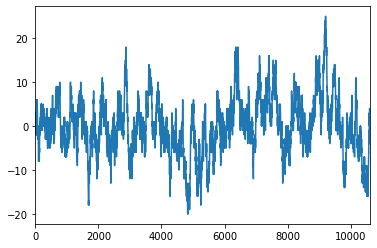

In [4]:
dataset['Count'].plot()

In [5]:
training_set=dataset['Count']
training_set=pd.DataFrame(training_set)

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler   #標準化去除釋股
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 10608):    #1258-60筆資料
    X_train.append(training_set_scaled[i-60:i, 0])   #0~59 , 0為column 為open 
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [9]:
# Initialising the RNN
regressor = Sequential()



W1212 10:10:48.065824 4438640064 deprecation_wrapper.py:119] From /anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



return_sequences：默认 False。在输出序列中，返回单个 hidden state值还是返回全部time step 的 hidden state值。 False 返回单个， true 返回全部。

In [10]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))           ##lstm 吃3d tensor 最後預測才輸出2d
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



W1212 10:10:56.532541 4438640064 deprecation_wrapper.py:119] From /anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1212 10:10:56.564387 4438640064 deprecation_wrapper.py:119] From /anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1212 10:10:56.956243 4438640064 deprecation_wrapper.py:119] From /anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1212 10:10:56.964148 4438640064 deprecation.py:506] From /anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will

In [11]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W1212 10:10:59.458803 4438640064 deprecation_wrapper.py:119] From /anaconda3/envs/python36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1212 10:10:59.756492 4438640064 deprecation.py:323] From /anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1212 10:11:01.978754 4438640064 deprecation_wrapper.py:119] From /anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
10548/10548 [==============================] - 151s 14ms/step - loss: 0.0082
Epoch 2/100
 2880/10548 [=======>......................] - ETA: 1:42 - loss: 0.0040

KeyboardInterrupt: 

In [29]:
# Getting the predicted stock price of 2017
#dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = dataset.values 
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 313):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_running_count = regressor.predict(X_test)
predicted_running_count = sc.inverse_transform(predicted_running_count)

In [30]:
predicted_running_count=pd.DataFrame(predicted_running_count)
predicted_running_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 1 columns):
0    253 non-null float32
dtypes: float32(1)
memory usage: 1.1 KB


In [15]:
real_running_count = dataset.iloc[:, 0:1].values 

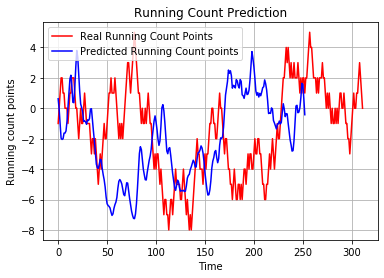

In [33]:

# Visualising the results
plt.plot(real_running_count, color = 'red', label = 'Real Running Count Points')
plt.plot(predicted_running_count, color = 'blue', label = 'Predicted Running Count points')
plt.title('Running Count Prediction')
plt.xlabel('Time')

plt.grid(True)

plt.ylabel('Running count points')
plt.legend()
plt.show()



In [34]:
# Getting the predicted stock price of 2017
#dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
#inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = dataset.values 
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_running_count = regressor.predict(X_test)
predicted_running_count = sc.inverse_transform(predicted_running_count)

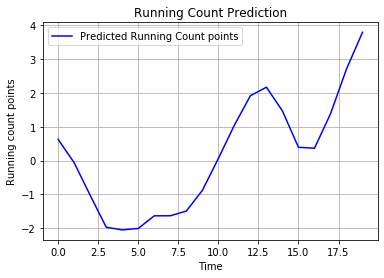

In [35]:

# Visualising the results

plt.plot(predicted_running_count, color = 'blue', label = 'Predicted Running Count points')
plt.title('Running Count Prediction')
plt.xlabel('Time')

plt.grid(True)

plt.ylabel('Running count points')
plt.legend()
plt.show()